In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales.csv")
print(df.head())

         Date   Product  Units_Sold  Unit_Price   Cost
0  2025-01-05    Laptop           3       60000  50000
1  2025-01-10     Mouse          10         500    300
2  2025-02-02  Keyboard           5        1500    900
3  2025-02-15    Laptop           2       60000  50000
4  2025-03-01     Mouse          15         500    300


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

In [4]:
df

,Date,Product,Units_Sold,Unit_Price,Cost,Month
0,2025-01-05,Laptop,3,60000,50000,2025-01
1,2025-01-10,Mouse,10,500,300,2025-01
2,2025-02-02,Keyboard,5,1500,900,2025-02
3,2025-02-15,Laptop,2,60000,50000,2025-02
4,2025-03-01,Mouse,15,500,300,2025-03
5,2025-03-10,Keyboard,8,1500,900,2025-03
6,2025-03-20,Laptop,1,60000,50000,2025-03


In [5]:
df['Revenue'] = df['Units_Sold'] * df['Unit_Price']
df['Total_Cost'] = df['Units_Sold'] * df['Cost']
df['Profit'] = df['Revenue'] - df['Total_Cost']
df

,Date,Product,Units_Sold,Unit_Price,Cost,Month,Revenue,Total_Cost,Profit
0,2025-01-05,Laptop,3,60000,50000,2025-01,180000,150000,30000
1,2025-01-10,Mouse,10,500,300,2025-01,5000,3000,2000
2,2025-02-02,Keyboard,5,1500,900,2025-02,7500,4500,3000
3,2025-02-15,Laptop,2,60000,50000,2025-02,120000,100000,20000
4,2025-03-01,Mouse,15,500,300,2025-03,7500,4500,3000
5,2025-03-10,Keyboard,8,1500,900,2025-03,12000,7200,4800
6,2025-03-20,Laptop,1,60000,50000,2025-03,60000,50000,10000


In [6]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue

Month
2025-01    185000
2025-02    127500
2025-03     79500
Freq: M, Name: Revenue, dtype: int64

In [7]:
best_products = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False)
best_products

Product
Mouse       25
Keyboard    13
Laptop       6
Name: Units_Sold, dtype: int64

In [8]:
profit_trend = df.groupby('Month')['Profit'].sum()
profit_trend

Month
2025-01    32000
2025-02    23000
2025-03    17800
Freq: M, Name: Profit, dtype: int64

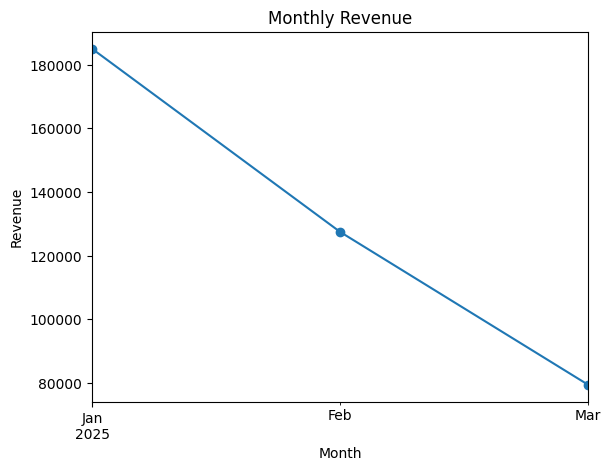

In [9]:
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

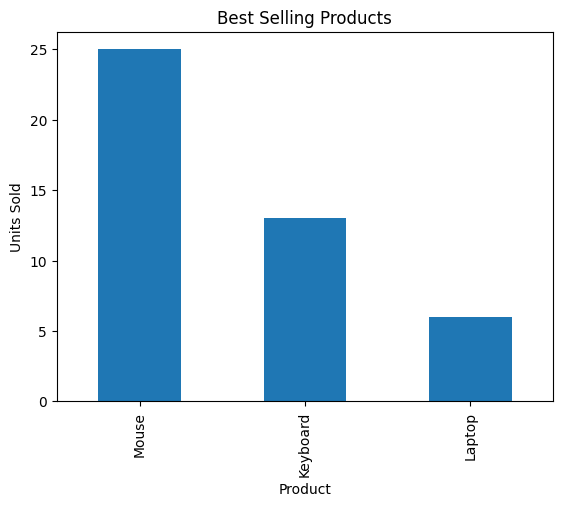

In [10]:
best_products.plot(kind='bar')
plt.title("Best Selling Products")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.show()

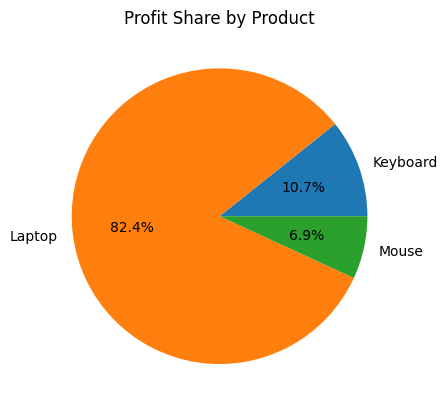

In [11]:
profit_by_product = df.groupby('Product')['Profit'].sum()

profit_by_product.plot(kind='pie', autopct='%1.1f%%')
plt.title("Profit Share by Product")
plt.ylabel("")
plt.show()

In [12]:
print("Average Revenue:", np.mean(df['Revenue']))
print("Max Profit:", np.max(df['Profit']))
print("Min Profit:", np.min(df['Profit']))

Average Revenue: 56000.0
Max Profit: 30000
Min Profit: 2000


In [13]:
plt.savefig("charts/monthly_revenue.png")

<Figure size 640x480 with 0 Axes>

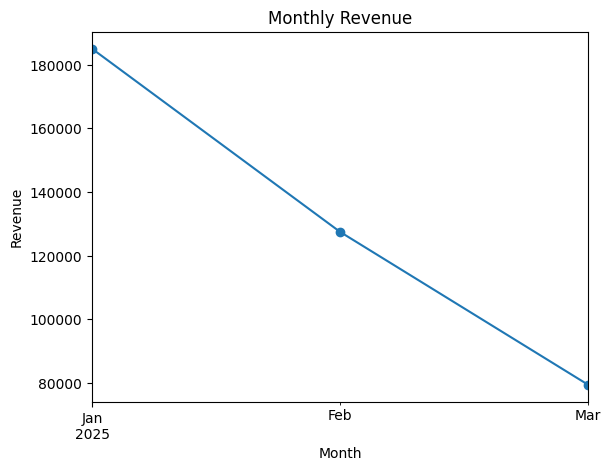

In [14]:
plt.figure()
monthly_revenue.plot(kind='line', marker='o')

plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.savefig("charts/monthly_revenue.png")   # 👈 Save first
plt.show()

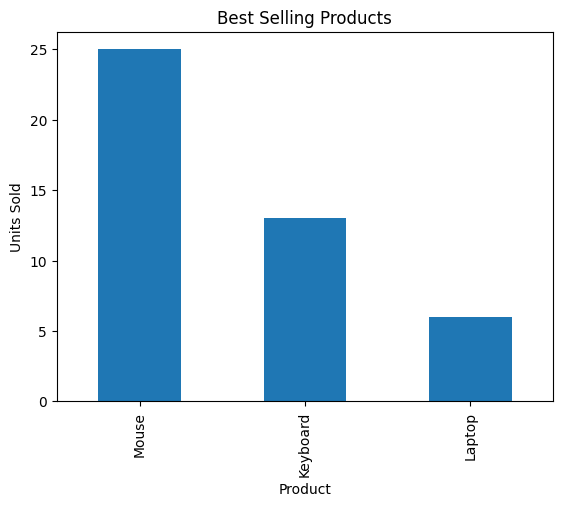

In [15]:
plt.figure()
best_products.plot(kind='bar')

plt.title("Best Selling Products")
plt.xlabel("Product")
plt.ylabel("Units Sold")

plt.savefig("charts/best_products.png")
plt.show()

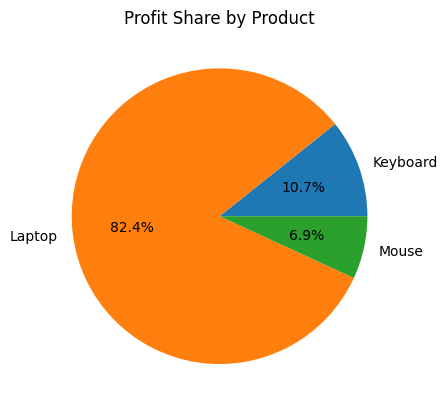

In [16]:
plt.figure()
profit_by_product.plot(kind='pie', autopct='%1.1f%%')

plt.title("Profit Share by Product")
plt.ylabel("")

plt.savefig("charts/profit_pie.png")
plt.show()